# Import Libraries

In [110]:
import os
import sys
import warnings
import torch


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms


%matplotlib inline
warnings.filterwarnings("ignore")

# Load Dataset

In [111]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Define a transform to normalize the data
transform = transforms.ToTensor()

# Download the MNIST training dataset
train_dataset = MNIST(root='./Drive', train=True, transform=transform, download=True)

# Download the MNIST testing dataset
test_dataset = MNIST(root='./Drive', train=False, transform=transform, download=True)

In [112]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Drive
    Split: Test
    StandardTransform
Transform: ToTensor()

In [113]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Drive
    Split: Train
    StandardTransform
Transform: ToTensor()

In [114]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [115]:
type(test_dataset)

torchvision.datasets.mnist.MNIST

In [116]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [117]:
type(train_dataset[0])

tuple

In [118]:
image,label = train_dataset[0]
image.shape

torch.Size([1, 28, 28])

In [119]:
label

5

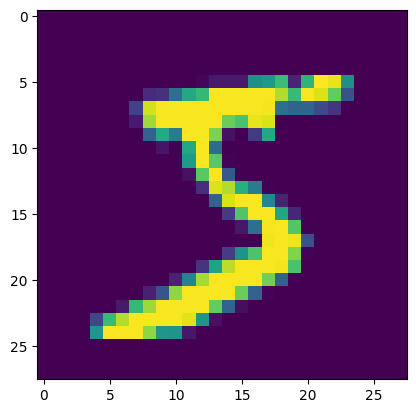

In [120]:
plt.imshow(image.reshape((28,28)))



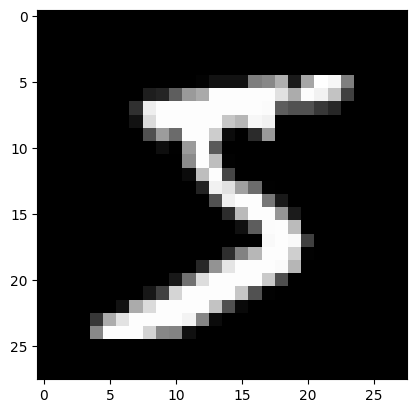

In [121]:
plt.imshow(image.reshape((28,28)),cmap = "gray")

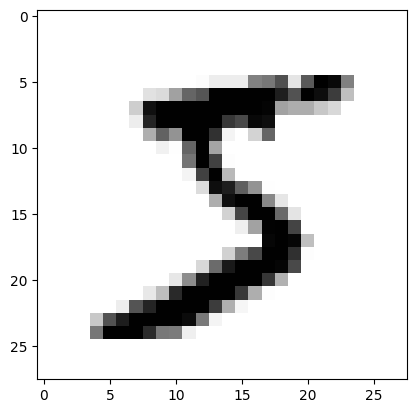

In [122]:
plt.imshow(image.reshape((28,28)),cmap = "gist_yarg") # For reverse color of above

In [123]:
torch.manual_seed(101)


train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=False)

In [124]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int = lambda x: f'{x:4}'))

In [125]:
for images, labels in train_loader:
  break

In [126]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [127]:
images.shape

torch.Size([100, 1, 28, 28])

In [128]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


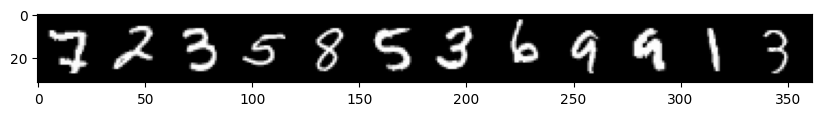

In [129]:
print("Labels: ", labels[:12].numpy())

im = make_grid(images[:12], nrow = 12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

# Building Model

In [130]:
import torch.optim as optim


class YourModel(nn.Module):
    def __init__(self, input_size= 784, hidden_size = [120,84], output_size = 10):
        super(YourModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1],output_size)

    def forward(self, X):
        X = F.relu(self.layer1(X))
        X = F.relu(self.layer2(X))
        X = self.layer3(X)

        return F.log_softmax(X,dim = 1)

In [131]:
torch.manual_seed(101)
model = YourModel()
model

YourModel(
  (layer1): Linear(in_features=784, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=84, bias=True)
  (layer3): Linear(in_features=84, out_features=10, bias=True)
)

In [132]:
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [133]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [134]:
images.shape

torch.Size([100, 1, 28, 28])

In [135]:
images.view(100,-1).shape

torch.Size([100, 784])

# Train Model

In [136]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

  trn_corr = 0
  tst_corr = 0

  for b,(X_train,y_train) in enumerate(train_loader):
    b+1

    y_pred = model(X_train.view(100,-1))
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted==y_train).sum()

    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if b%200 == 0:
      if b!= 0:
         acc = trn_corr.item()*100/(100*b)
         print(f"Epoch: {i} Batch{b} Loss: {loss.item()} Accuracy:{acc}")

      else:
        print(f"Epoch: {i} Batch{b} Loss: {loss.item()} Accuracy: N/A(b is zero)")
  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test,y_test) in enumerate(test_loader):

      y_val = model(X_test.view(500,-1))
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted==y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



total_time = time.time() - start_time
print(f"Duration: {total_time/60} mins")

Epoch: 0 Batch0 Loss: 2.2976903915405273 Accuracy: N/A(b is zero)
Epoch: 0 Batch200 Loss: 0.39377984404563904 Accuracy:83.68
Epoch: 0 Batch400 Loss: 0.3783434331417084 Accuracy:87.7475
Epoch: 1 Batch0 Loss: 0.22303272783756256 Accuracy: N/A(b is zero)
Epoch: 1 Batch200 Loss: 0.26962754130363464 Accuracy:95.28
Epoch: 1 Batch400 Loss: 0.10093645751476288 Accuracy:95.3
Epoch: 2 Batch0 Loss: 0.09766124933958054 Accuracy: N/A(b is zero)
Epoch: 2 Batch200 Loss: 0.12393984198570251 Accuracy:97.0
Epoch: 2 Batch400 Loss: 0.07516620308160782 Accuracy:96.8675
Epoch: 3 Batch0 Loss: 0.062229860574007034 Accuracy: N/A(b is zero)
Epoch: 3 Batch200 Loss: 0.0638371929526329 Accuracy:98.125
Epoch: 3 Batch400 Loss: 0.05016268417239189 Accuracy:97.745
Epoch: 4 Batch0 Loss: 0.049001093953847885 Accuracy: N/A(b is zero)
Epoch: 4 Batch200 Loss: 0.036483071744441986 Accuracy:98.645
Epoch: 4 Batch400 Loss: 0.0881747305393219 Accuracy:98.25
Epoch: 5 Batch0 Loss: 0.015283755958080292 Accuracy: N/A(b is zero)
Epo

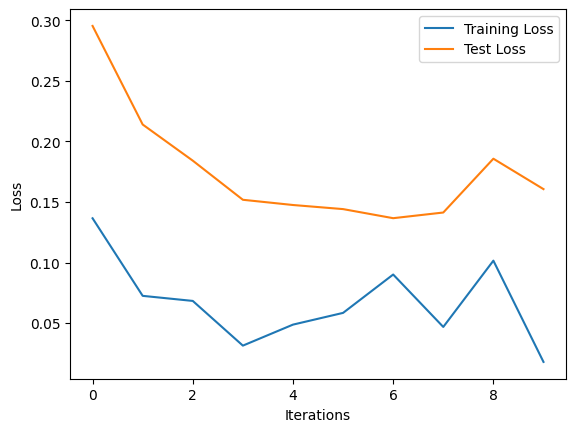

In [137]:
import matplotlib.pyplot as plt

# Assuming train_losses is your list containing training losses

# Convert the tensor to a NumPy array after detaching from the computation graph
train_losses_np = [loss.detach().numpy() for loss in train_losses]

plt.plot(train_losses_np, label="Training Loss")
test_losses_np = [loss.detach().numpy() for loss in test_losses]

plt.plot(test_losses_np, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [138]:
train_correct[0]/600

tensor(89.5733)

In [139]:
train_acc = [t/600 for  t in train_correct]
train_acc

[tensor(89.5733),
 tensor(95.3600),
 tensor(96.7167),
 tensor(97.5000),
 tensor(98.0217),
 tensor(98.3917),
 tensor(98.6883),
 tensor(98.9183),
 tensor(99.1367),
 tensor(99.2667)]

In [140]:
test_acc = [t/100 for  t in test_correct]
test_acc

[tensor(94.3600),
 tensor(95.9200),
 tensor(96.9500),
 tensor(97.0100),
 tensor(97.6200),
 tensor(97.6600),
 tensor(97.7800),
 tensor(97.6600),
 tensor(97.4100),
 tensor(97.6300)]

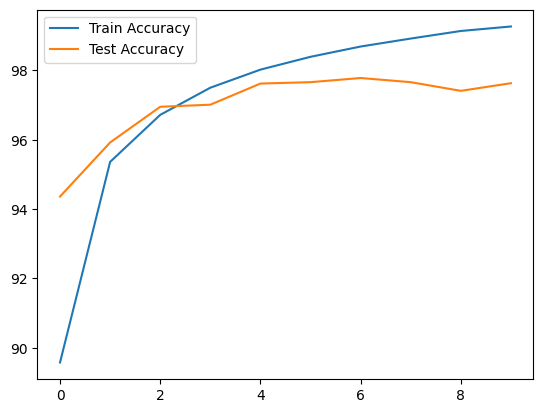

In [141]:
plt.plot(train_acc, label = "Train Accuracy")
plt.plot(test_acc,label = "Test Accuracy")
plt.legend()
plt.show()

# Evaluation Of Model On Unseen Data

In [142]:
test_load_all = DataLoader(test_dataset, batch_size=10000,shuffle=False)

In [143]:
with torch.no_grad():
  correct = 0

  for X_test,y_test in test_load_all:
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted==y_test).sum()

In [144]:
correct

tensor(9763)

In [145]:
100*correct.item()/len(test_dataset)

97.63

In [146]:
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[ 968    0    4    0    1    2    5    2    4    0]
 [   0 1123    3    0    0    0    3    7    0    2]
 [   0    3  999    2    1    0    1    9    3    0]
 [   2    2   10  987    0    9    1    4    4    2]
 [   1    0    2    0  961    3    1    3    3    6]
 [   0    0    0    8    0  867    5    1    4    4]
 [   2    2    1    0    6    2  941    0    1    0]
 [   1    0    2    4    1    1    0  976    2    0]
 [   4    5   11    2    0    6    1    3  948    2]
 [   2    0    0    7   12    2    0   23    5  993]]


In [148]:
print(classification_report(predicted.view(-1), y_test.view(-1)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       986
           1       0.99      0.99      0.99      1138
           2       0.97      0.98      0.97      1018
           3       0.98      0.97      0.97      1021
           4       0.98      0.98      0.98       980
           5       0.97      0.98      0.97       889
           6       0.98      0.99      0.98       955
           7       0.95      0.99      0.97       987
           8       0.97      0.97      0.97       982
           9       0.98      0.95      0.97      1044

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Conclusion:
#### From above analysis it is clear that our model performing well with accuracy of 98%.